## CELL 1: Import & Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị biểu đồ
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Đã import thư viện thành công!")

Đã import thư viện thành công!


## Cell 2: Load dữ liệu 

In [7]:
# --- CELL 2: LOAD DỮ LIỆU ---

import pandas as pd

# 1. Đường dẫn file
PATH_RELABELED = '../data/ablation_studies/val_dl_relabeled_1.csv'
PATH_PREDICTED = '../data/ablation_studies/pred_01_baseline_1.csv'

# 2. Đọc file
try:
    df_labels = pd.read_csv(PATH_RELABELED)
    df_predicted = pd.read_csv(PATH_PREDICTED)

    print("Đọc file thành công!")
    print(f"- File nhãn thủ công: {len(df_labels)} dòng")
    print(f"- File dự đoán: {len(df_predicted)} dòng")

except FileNotFoundError as e:
    print(f"LỖI: Không tìm thấy file. Bạn kiểm tra kỹ lại đường dẫn nhé!\n{e}")
except Exception as e:
    print(f"LỖI KHÁC: {e}")

Đọc file thành công!
- File nhãn thủ công: 726 dòng
- File dự đoán: 726 dòng


## Cell 3: Gộp bảng (Merge)
Gộp bảng (Merge) để lấy Type và Aspect sang file lỗi

In [ ]:
try:
    df_merge = pd.merge(df_predicted, 
                           df_labels[['ID', 'Aspect', 'Type']], 
                           on='ID', how='left')
    
    # So sánh cột 'Predicted' với cột 'Actual'
    df_merge['Is_Correct'] = df_merge['Predicted'] == df_merge['Actual']

    print("Gộp dữ liệu thành công!")
    print(f"File Predicted (Final): {len(df_predicted)} dòng.")
    print("Đã sẵn sàng để vẽ biểu đồ!")

except Exception as e:
    print(f"Lỗi khi gộp bảng: {e}")

Gộp dữ liệu thành công!
File Predicted (Final): 726 dòng.
Đã sẵn sàng để vẽ biểu đồ!


## Cell 4: Tổng quan

C:\Users\NGOC\AppData\Local\Temp\ipykernel_20324\3748419780.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_type, y='Type',


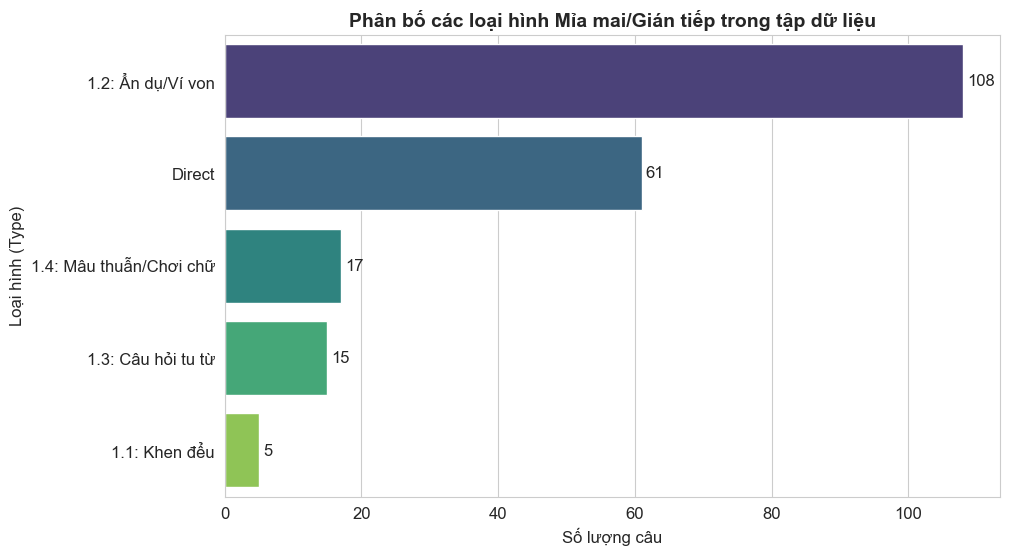

In [15]:
# Chỉ lấy nhãn Type (Label 1)
df_type = df_labels.dropna(subset=['Type'])

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_type, y='Type', 
                   order=df_type['Type'].value_counts().index, 
                   palette='viridis')

plt.title('Phân bố các loại hình Mỉa mai/Gián tiếp trong tập dữ liệu', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng câu')
plt.ylabel('Loại hình (Type)')

for container in ax.containers:
    ax.bar_label(container, padding=3) 

plt.show()

## CellL 5: Phân tích Lỗi theo Loại hình (Sarcasm/Metaphor...)
Mục đích: Xem thử thiếu Emoji hay thiếu Teencode thì mô hình dễ bị sai các câu mỉa mai hơn.

C:\Users\NGOC\AppData\Local\Temp\ipykernel_20324\1484666965.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=type_error, x='Type', y='Error_Rate', palette='Reds_r')


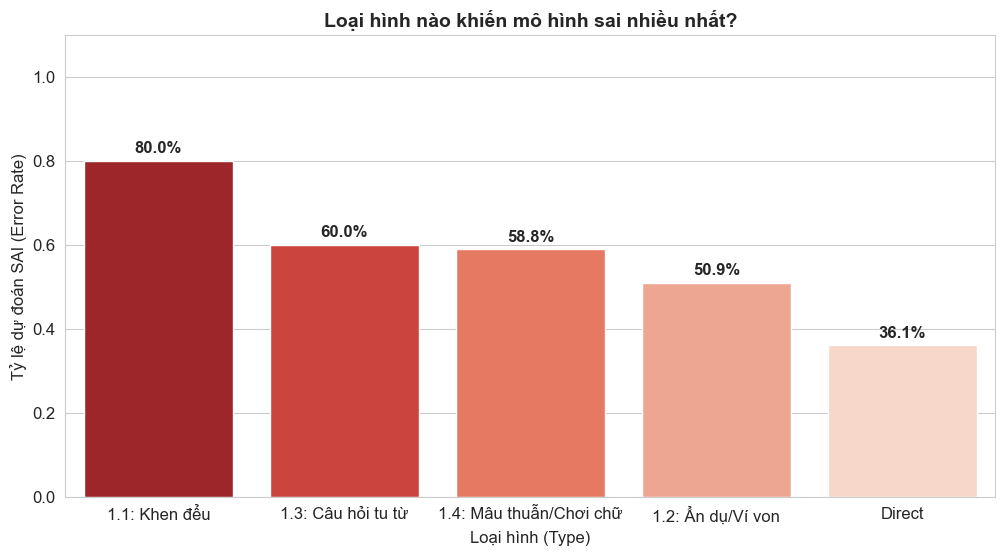

In [17]:
# 1. Tính tỷ lệ sai (Error Rate)
type_error = df_merge.groupby('Type')['Is_Correct'].mean().reset_index()
type_error['Error_Rate'] = 1 - type_error['Is_Correct']
type_error = type_error.sort_values('Error_Rate', ascending=False)

# 2. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=type_error, x='Type', y='Error_Rate', palette='Reds_r')

plt.title('Loại hình nào khiến mô hình sai nhiều nhất?', fontsize=14, fontweight='bold')
plt.ylabel('Tỷ lệ dự đoán SAI (Error Rate)')
plt.xlabel('Loại hình (Type)')
plt.ylim(0, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points', fontweight='bold')

plt.show()

## Cell 6: So sánh về Độ dài câu (Length)
tính độ dài và so sánh tỷ lệ lỗi

C:\Users\NGOC\AppData\Local\Temp\ipykernel_20324\3467295416.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=len_error, x='Length_Group', y='Error_Rate', palette='Blues')


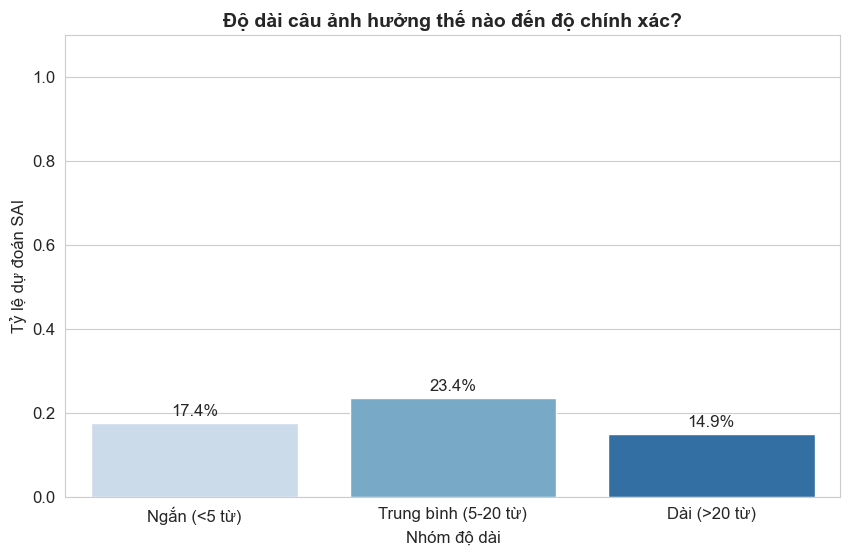

In [19]:
# 1. Tính số từ (Word Count) - Giờ mới tính ở đây
col_text = 'Comment' if 'Comment' in df_merge.columns else 'Text'
df_merge['Word_Count'] = df_merge[col_text].astype(str).apply(lambda x: len(x.split()))

# 2. Phân nhóm độ dài
def categorize_length(length):
    if length < 5: return 'Ngắn (<5 từ)'
    elif length <= 20: return 'Trung bình (5-20 từ)'
    else: return 'Dài (>20 từ)'

df_merge['Length_Group'] = df_merge['Word_Count'].apply(categorize_length)
order_list = ['Ngắn (<5 từ)', 'Trung bình (5-20 từ)', 'Dài (>20 từ)']

# 3. Tính tỷ lệ sai
len_error = df_merge.groupby('Length_Group')['Is_Correct'].mean().reindex(order_list).reset_index()
len_error['Error_Rate'] = 1 - len_error['Is_Correct']

# 4. Vẽ biểu đồ
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=len_error, x='Length_Group', y='Error_Rate', palette='Blues')

plt.title('Độ dài câu ảnh hưởng thế nào đến độ chính xác?', fontsize=14, fontweight='bold')
plt.ylabel('Tỷ lệ dự đoán SAI')
plt.xlabel('Nhóm độ dài')
plt.ylim(0, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.show()